# Análisis de las ventas mundiales de videojuegos
 **Equipo 5**
- Luis David Dávila Torres
- Josue Alonso Salazar Serrato

## Índice   
1. [Objetivo](#id1)
2. [Preguntas de interés](#id2)
3. [Introducción](#id3)
4. [Procesando los datos](#id4)
    1. [Visualización de los datos](#id4.1)
    2. [Tipos de Datos](#id4.2)
    3. [Datos Nulos](#id4.3)
    4. [Limpieza](#id4.4)
5. [Datos Procesados](#id5)
6. [Descripción estadística](#id6)
7. [Gráficos](#id7)

## Objetivo <a name="id1"></a>
Construir un modelo que pueda predecir las ventas de videojuegos en función de otras características del conjunto de datos de las ventas de videojuegos.


## Preguntas de interés<a name="id2"></a>

1.	¿Cuál sería la venta esperada de cierto videojuego con ciertas características si se lanza al mercado por zona específica o en forma global?
2.	Como gerente de una desarrolladora de videojuegos, ¿me convendría crear mi juego exclusivo para alguna compañia, o de un genero en especifico conociendo ya las preferencias de alguna region en especifico?

## Introducción<a name="id3"></a>
La base de datos está orientada a las ventas mundiales en distintas regiones de videojuegos, esta información es bastante útil para generar una predicción o estimación para el lanzamiento de un videojuego con ciertas características en las distintas regiones correspondientes, también puede ayudar en base a las ventas en distintas regiones a saber el impacto de cierto videojuego y si convendría o no su lanzamiento en dada región debido a su volumen de venta y crítica. 

Las ventas en esta base de datos están en unidades de millones.


## Procesando los datos<a name="id4"></a>

Importar las librerías.

In [180]:
import pandas as pd 
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline

Cargar el archivo con la información de nuestra base.

In [181]:
#SALES = pd.read_csv("C:/Users/jos/josue/Mineria_de_Datos/Avance PIA/BASE USAR.csv", index_col=0) #josue
SALES = pd.read_csv("C:/Users/david/Mineria Datos/josue/Mineria_de_Datos/Avance PIA/BASE USAR.csv") # David 
Data=pd.DataFrame(SALES)

**Visualización de los datos**<a name="id4.1"></a>

In [14]:
Data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


Visualizamos los primeros 5 registros de la base de datos donde vemos algunos datos nulos (NaN), asi como columnas que no necesitaremos y nombres de de columnas en inglés que pasaremos a ajustar posteriormente para una mejor comprension.

Cantidad de registros y variables o columnas.

In [15]:
Data.shape

(16719, 16)

Obtenemos un total de 16719 registros con 16 columnas o variables.

**Tipos de Datos** <a name="id4.2"></a>

Información necesaria para realizar los análisis y no exista problemas por no homogenización de los datos de cada columna

In [204]:
Data.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

Tenemos datos float64 para numéricos y object para string o cadena de caracteres.




**Datos Nulos** <a name="id4.3"></a>

Se busca encontrar registros que puedan afectar al momento de realizar nuestros datos estadísticos o a la aplicación de los modelos a usar

In [205]:
Data.isnull().any()

Name                True
Platform           False
Year_of_Release     True
Genre               True
Publisher           True
NA_Sales           False
EU_Sales           False
JP_Sales           False
Other_Sales        False
Global_Sales       False
Critic_Score        True
Critic_Count        True
User_Score          True
User_Count          True
Developer           True
Rating              True
dtype: bool

Tenemos 6 Columnas sin datos nulos y 10 con datos nulos.

**Cantidad de Datos Nulos por Columna**

In [206]:
Data.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

Se encontró una cantidad muy grande de registros nulos por lo que pasaremos a una limpieza

**Limpieza**<a name="id4.4"></a>

Primeramente renombramos las columnas que utilizaremos en nuestro análisis y guardamos en un nuevo data para evitar pérdida de datos de nuestra data original.

In [182]:
Data2=Data.rename(columns = {'Name':'Nombre','Platform':'Plataforma','Year_of_Release':'Lanzamiento','Genre':'Genero','NA_Sales':'V_NA',
                             'EU_Sales':'V_EU','JP_Sales':'V_JP','Other_Sales':'V_Otros','Global_Sales':'V_Global',
                             'Critic_Score':'Score','User_Score':'Score_Usuarios','Rating':'ESRB'})

Eliminando Columnas innecesarias
- Publisher

- Critic Count

- User Count

- Developer

- Score Usuarios    

In [183]:
Data3=Data2.drop(['Publisher','Critic_Count', 'User_Count', 'Developer','Score_Usuarios'],axis=1)

Eliminando los registros con datos nulos en nuestra base.

In [184]:
Data4 = Data3.dropna(axis=0) 

Se arregla el tipo de dato del año dejandolo como entero

In [185]:
Data4['Lanzamiento'] = Data4['Lanzamiento'].astype(np.int64)

C:\Users\david\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Re ordenaremos los index de cada juego para poder simplificar los algoritmos que se usaran.

In [206]:
Data5=Data4.reset_index(drop=True)

## Datos Procesados <a name="id5"></a>

In [12]:
Data5.head()

,Nombre,Plataforma,Lanzamiento,Genero,V_NA,V_EU,V_JP,V_Otros,V_Global,Score,ESRB
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,82.53,76.0,E
1,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,35.52,82.0,E
2,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,32.77,80.0,E
3,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,29.80,89.0,E
4,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,28.92,58.0,E


In [13]:
Data5.shape

(7902, 11)

Después de realizar toda la limpieza nos da un resultado de 7902 Registros y 11 Columnas listos para realizar nuestros análisis .

## Descripción estadística <a name="id6"></a>

Dado que algunos juegos se venden en distintas plataformas es importante saber exactamente
cuantos juegos en realidad analisaremos para esto, se emplea la siguiente linea. 

Tambien nos importa el numero de plataformas de videojuegos. 

In [14]:
len(Data5['Nombre'].unique())
len(Data5['Plataforma'].unique())

17

Tenemos 4975 juegos que se lanzaron en 17 plataformas distintas.

Obtendemos nuevos data frame con la informacion de los titulos de juegos que cada compañia se encarga de comercializar estas plataformas Nintendo, Sony, Sega, Microsoft, Otros.


In [187]:
Nintendo = Data5[(Data5['Plataforma'] == '3DS') | (Data5['Plataforma'] == 'DS') | (Data5['Plataforma'] == 'GB') |(Data5['Plataforma'] == 'GBA') | (Data5['Plataforma'] == 'N64') | (Data5['Plataforma'] == 'GC') | (Data5['Plataforma'] == 'NES') | (Data5['Plataforma'] == 'SNES') | (Data5['Plataforma'] == 'Wii') | (Data5['Plataforma'] == 'WiiU')]
Sony = Data5[ (Data5['Plataforma'] == 'PS') |(Data5['Plataforma'] == 'PS2') | (Data5['Plataforma'] == 'PSP') | (Data5['Plataforma'] == 'PS3') | (Data5['Plataforma'] == 'PS4') | (Data5['Plataforma'] == 'PSV')]
Sega = Data5[(Data5['Plataforma'] == 'GEN') |(Data5['Plataforma'] == 'SCD') | (Data5['Plataforma'] == 'DC') | (Data5['Plataforma'] == 'GG')]
Microsoft = Data5[(Data5['Plataforma'] == 'XB') |(Data5['Plataforma'] == 'X360') | (Data5['Plataforma'] == 'XOne') ]
Otros = Data5[(Data5['Plataforma'] == '2006') |(Data5['Plataforma'] == '3DO') | (Data5['Plataforma'] == 'NG') | (Data5['Plataforma'] == 'PCFX') | (Data5['Plataforma'] == 'TG16') ]


Reseteando los index de cada una.

In [188]:
Nintendo=Nintendo.reset_index(drop=True)
Sony=Sony.reset_index(drop=True)
Sega=Sega.reset_index(drop=True)
Microsoft=Microsoft.reset_index(drop=True)
Otros=Otros.reset_index(drop=True)

Mostrando los nuevo data frames.

**Nintendo**

In [189]:
Nintendo.head()

,Nombre,Plataforma,Lanzamiento,Genero,V_NA,V_EU,V_JP,V_Otros,V_Global,Score,ESRB
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.53,76.0,E
1,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82.0,E
2,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80.0,E
3,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,29.80,89.0,E
4,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,28.92,58.0,E


**Sony**

In [27]:
Sony.head()

,Nombre,Plataforma,Lanzamiento,Genero,V_NA,V_EU,V_JP,V_Otros,V_Global,Score,ESRB
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,21.04,97.0,M
1,Grand Theft Auto: San Andreas,PS2,2004,Action,9.43,0.40,0.41,10.57,20.81,95.0,M
2,Grand Theft Auto: Vice City,PS2,2002,Action,8.41,5.49,0.47,1.78,16.15,95.0,M
3,Gran Turismo 3: A-Spec,PS2,2001,Racing,6.85,5.09,1.87,1.16,14.98,95.0,E
4,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,13.79,83.0,M


**Sega**

In [28]:
Sega.head()

,Nombre,Plataforma,Lanzamiento,Genero,V_NA,V_EU,V_JP,V_Otros,V_Global,Score,ESRB
0,Shenmue,DC,1999,Adventure,0.52,0.24,0.38,0.04,1.18,88.0,T
1,NFL 2K1,DC,2000,Sports,1.02,0.05,0.00,0.02,1.09,97.0,E
2,Seaman,DC,1999,Simulation,0.00,0.00,0.52,0.00,0.52,82.0,T
3,SoulCalibur,DC,1999,Fighting,0.00,0.00,0.34,0.00,0.34,98.0,T
4,Capcom vs. SNK,DC,2000,Fighting,0.00,0.00,0.22,0.00,0.22,80.0,T


**Microsoft**

In [29]:
Microsoft.head()

,Nombre,Plataforma,Lanzamiento,Genero,V_NA,V_EU,V_JP,V_Otros,V_Global,Score,ESRB
0,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,21.81,61.0,E
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,16.27,97.0,M
2,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,14.73,88.0,M
3,Call of Duty: Black Ops,X360,2010,Shooter,9.70,3.68,0.11,1.13,14.61,87.0,M
4,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,13.67,83.0,M


In [38]:
#No boorrres son pruebas
#ata5['Plataforma'].unique()

#Data5['Plataforma'].describe().top
#Data5[Data5['Nombre']=='Grand Theft Auto V']
Data5[Data5['Score']==Data5['Score'].min()] #Juego con el puntaje mas bajo 
Data5[Data5['Score']==Data5['Score'].max()] #Juego con el puntaje mas alto


,Nombre,Plataforma,Lanzamiento,Genero,V_NA,V_EU,V_JP,V_Otros,V_Global,Score,ESRB
32,Grand Theft Auto IV,X360,2008,Action,6.76,3.07,0.14,1.03,11.01,98.0,M
37,Grand Theft Auto IV,PS3,2008,Action,4.76,3.69,0.44,1.61,10.50,98.0,M
156,Tony Hawk's Pro Skater 2,PS,2000,Sports,3.05,1.41,0.02,0.20,4.68,98.0,T
3257,SoulCalibur,DC,1999,Fighting,0.00,0.00,0.34,0.00,0.34,98.0,T


In [25]:
Generacion7 = Data5[Data5.Plataforma.isin(['Wii', 'PS3', 'X360'])]
Generacion7.shape

(2254, 11)

In [26]:
Generacion8 = Data5[Data5.Plataforma.isin(['WiiU', 'PS4', 'XOne'])]
Generacion8.shape

(492, 11)

## Gráficos <a name="id7"></a>

**Ventas Globales para la 7ma Generacion**

Text(0, 0.5, 'Ventas Globales')

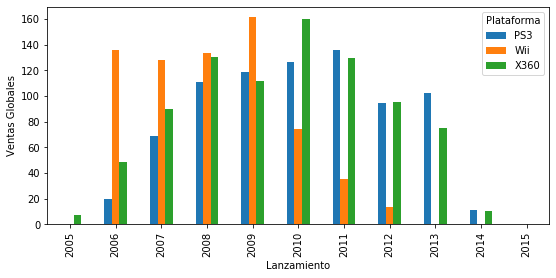

In [27]:
VentaAnual7 = Generacion7.groupby(['Lanzamiento','Plataforma']).V_Global.sum()
VentaAnual7.unstack().plot(kind='bar',figsize=(9, 4))
#plt.title('Ventas Globales para la 7ma Generacion')
plt.ylabel('Ventas Globales')

Se puede observar que del año 2006 al 2009 Wii era la mejor opcion para invertir dado a su alto numero de ventas en dicha plataforma, siendo posteriormente relegada, por PS3 y Xbox 360 y decresiendo estos ya para final de la generacion en 2014

**Ventas Globales para la 8va Generacion**

Text(0, 0.5, 'Ventas Globales')

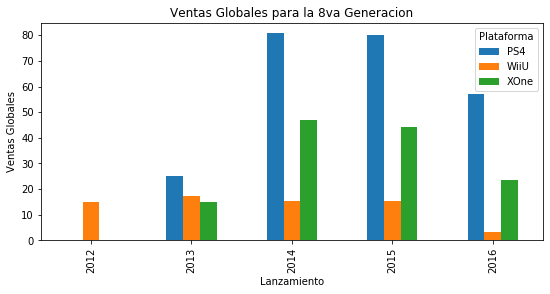

In [130]:
VentaAnual8 = Generacion8.groupby(['Lanzamiento','Plataforma']).V_Global.sum()
VentaAnual8.unstack().plot(kind='bar',figsize=(9, 4))
plt.title('Ventas Globales para la 8va Generacion')
plt.ylabel('Ventas Globales')

Esta es la generacion actual por lo que si se desea desarrollar un juego nuevo es un aspecto importante por que se relaciona directamente con el numero de plataformas, aun que igualmente existen juegos que se pueden desarrollar para las 3 consolas pero aun costo mayor de produccion.

**Generos con mas unidades de juegos a la venta**

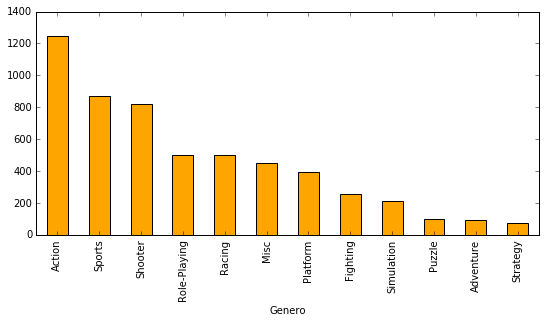

In [230]:
NGenero = Data5.groupby(['Genero']).sum().copy()
NGenero.V_Global.sort_values(ascending=False).plot(kind='bar', figsize=(9, 4),color='orange');

Cuales la mayor competencia en el sector de videojuegos con respecto a genero, pero esto se relaciona con los gustos del mercado de cada region.

**Generos mas populares en Japon en base a sus ingresos**

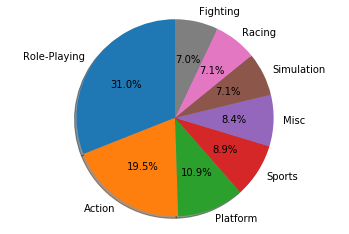

In [128]:
NGenJp=Data5.groupby('Genero').sum().V_JP.sort_values(ascending=False).head(8)
fig1, ax1 = plt.subplots()
ax1.pie(NGenJp, labels=NGenJp.index, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

En japon se vende mas juegos del tipo Role-Playing por lo que si vamos a producir un juego en este pais hay que seguir estos gustos para una mayor seguiridad de exito.

**Ventas Globales por Region en unidades de millones a travez del tiempo**

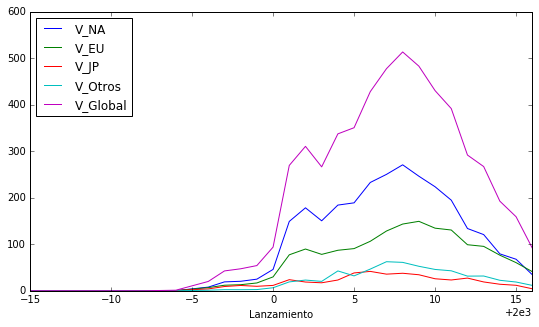

In [229]:
Ventas = Data5[[x for x in Data5.columns if 'V_' in x]+['Lanzamiento']]
#Ventas
Ventas.groupby('Lanzamiento').sum().plot(figsize=(9, 5))


Se aprecia que las ventas globales han tenido un decremento a partir del año 2009, esto generado por la decentralizacion de la industria, que se ha expandido, a pc y smartphones.